# Homework 1

**Yibo Xu, 6299196**

Reproduce the figure 9.2 in *Theoretical Neuroscience*.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import stats

In [87]:
class SimpleTD:
    def __init__(self, rangeTime, rangeTrials, lr) -> None:
        """
        rangeTime (tuple): the range of time
        rangeTrials (int): the range of trials
        lr (float): learning rate
        """
        self.rangeTime = rangeTime
        self.rangeTrials = rangeTrials
        self.lr = lr
        self.totalTime = rangeTime[1] - rangeTime[0] + 1
        self.weight = np.zeros((self.totalTime, rangeTrials))
        self.stimli = np.zeros((self.totalTime, rangeTrials))
        self.expect = np.zeros((self.totalTime, rangeTrials))
        self.reward = np.zeros((self.totalTime, rangeTrials))
        self.predErr = np.zeros((self.totalTime, rangeTrials))
    def assign_reward(self, t, n, r):
        """
        t (int): time
        n (int): trial
        r (float): reward
        """
        self.reward[t, n] = r
    def assign_stimli(self, t, n, s):
        """
        t (int): time
        n (int): trial
        s (float): stimli
        """
        self.stimli[t, n] = s
    def learn(self, trial):
        """
        offline update version
        trial (int): trial
        """
        self.expect[0, trial] = self.weight[0, trial] * self.stimli[0, trial]
        self.expect[self.totalTime-1, trial] = np.convolve(self.weight[:, trial], self.stimli[:, trial], 'valid')
        for t in range(1, self.totalTime - 1):
            self.expect[t, trial] = np.convolve(self.weight[:t+1, trial], self.stimli[:t+1, trial], 'valid')
        self.predErr[0, trial] = self.reward[0, trial] + self.expect[1, trial] - self.expect[0, trial]
        for t in range(1, self.totalTime - 1):
            self.predErr[t, trial] = self.reward[t, trial] + self.expect[t+1, trial] - self.expect[t, trial]
        self.predErr[self.totalTime-1, trial] = self.reward[self.totalTime-1, trial] - self.expect[self.totalTime-1, trial]
        for t in range(0, self.totalTime):
            for tau in range(0, t+1):
                self.weight[tau, trial] = self.weight[tau, trial] + self.lr * self.predErr[t, trial] * self.stimli[t - tau, trial]
    def process(self):
        """
        """
        for n in range(self.rangeTrials):
            self.learn(n)
            if n < self.rangeTrials - 1:
                self.weight[:, n+1] = self.weight[:, n]
    def plot_3d(self, ax):
        X = np.arange(self.totalTime)
        Y = np.arange(self.rangeTrials)
        X, Y = np.meshgrid(X, Y)
        Z = self.predErr[X, Y]
        ax.set_xlabel('time')
        ax.set_ylabel('trial')
        ax.set_zlabel('prediction error')
        ax.plot_surface(X, Y, Z)
        ax.view_init(elev=10, azim=-80, roll=-5)
        # roll: rotate the x axis
        # elev: rotate the y axis
        # azim: rotate the z axis
    def plot_predErr(self, ax, trial):
        ax.set_xlabel('time')
        ax.set_ylabel('prediction error')
        if trial == 0:
            ax.set_title('prediction error before training')
        if trial == self.rangeTrials - 1:
            ax.set_title('prediction error after training')
        ax.plot(self.predErr[:, trial])
    def plot_weight(self, ax, trial):
        ax.set_xlabel('time')
        ax.set_ylabel('weights')
        if trial == 0:
            ax.set_title('weights before training')
        if trial == self.rangeTrials - 1:
            ax.set_title('weights after training')
        ax.plot(self.weight[:, trial])
    def plot_weight_change(self, ax, time):
        ax.set_xlabel('trial')
        ax.set_ylabel('weights')
        ax.set_title('weights change in time ' + str(time))
        ax.plot(self.weight[time, :])
    def plot_expect_change(self, ax, time):
        ax.set_xlabel('trial')
        ax.set_ylabel('expect')
        ax.set_title('expect change in time ' + str(time))
        ax.plot(self.expect[time, :])
    def plot_predErr_change(self, ax, time):
        ax.set_xlabel('trial')
        ax.set_ylabel('prediction error')
        ax.set_title('prediction error change in time ' + str(time))
        ax.plot(self.predErr[time, :])
    def plot_expect(self, ax, trial):
        ax.set_xlabel('time')
        ax.set_ylabel('expect')
        if trial == 0 or trial == 1:
            ax.set_title('expect before training')
        if trial == self.rangeTrials - 1:
            ax.set_title('expect after training')
        ax.plot(self.expect[:, trial])
    def plot_expect_diff(self, ax, trial):
        ax.set_xlabel('time')
        ax.set_ylabel('expect')
        if trial == 0 or trial == 1:
            ax.set_title('expect diff before training')
        if trial == self.rangeTrials - 1:
            ax.set_title('expect diff after training')
        ax.plot(self.expect[1:, trial] - self.expect[:-1, trial])
    def plot(self):
        """
        plot 3-d figure of prediction error in each time and trial
        """
        fig = plt.figure(figsize=(30, 40))
        ax = fig.add_subplot(4, 3, 1, projection='3d')
        self.plot_3d(ax)
        # plt.subplots_adjust(left=0.1, right=2)
        ax = fig.add_subplot(4, 3, 2)
        self.plot_predErr(ax, 0)
        ax = fig.add_subplot(4, 3, 3)
        self.plot_predErr(ax, self.rangeTrials-1)
        ax = fig.add_subplot(4, 3, 4)
        self.plot_weight_change(ax, 99)
        ax = fig.add_subplot(4, 3, 5)
        self.plot_weight(ax, 0)
        ax = fig.add_subplot(4, 3, 6)
        self.plot_weight(ax, self.rangeTrials-1)
        ax = fig.add_subplot(4, 3, 7)
        self.plot_expect_change(ax, 100)
        ax = fig.add_subplot(4, 3, 8)
        self.plot_expect(ax, 1)
        ax = fig.add_subplot(4, 3, 9)
        self.plot_expect(ax, self.rangeTrials-1)
        ax = fig.add_subplot(4, 3, 10)
        self.plot_predErr_change(ax, 100)
        ax = fig.add_subplot(4, 3, 11)
        self.plot_expect_diff(ax, 1)
        ax = fig.add_subplot(4, 3, 12)
        self.plot_expect_diff(ax, self.rangeTrials-1)
        plt.subplots_adjust(left=0.1, right=1.2, wspace=0.4, hspace=0.3)
        # plt.margins(0.2)
        plt.show()

def main():
    rangeTime = (0, 250)
    rangeTrials = 200
    lr = 0.7
    model = SimpleTD(rangeTime, rangeTrials, lr)
    rewardVariable = stats.norm(scale=8)
    sumReward = np.zeros(model.totalTime)
    for n in range(rangeTrials):
        for t in range(-50, 50):
            model.assign_reward(200+t, n, rewardVariable.pdf(t))
            # sumReward[200+t] += rewardVariable.pdf(t)
        # for t in range(-50, 50):
            # model.assign_reward(170+t, n, rewardVariable.pdf(t))
            # sumReward[170+t] += rewardVariable.pdf(t)
        # for i in range(100, 150):
        #     sumReward[i] += 1
        # for i in range(70, 120):
        #     sumReward[i] += 1
        # for t in range(model.totalTime):
        #     model.assign_reward(t, n, sumReward[t])
        model.assign_stimli(100, n, 1)
        # model.assign_stimli(70, n, 1)
    model.process()
    model.plot()
    return model

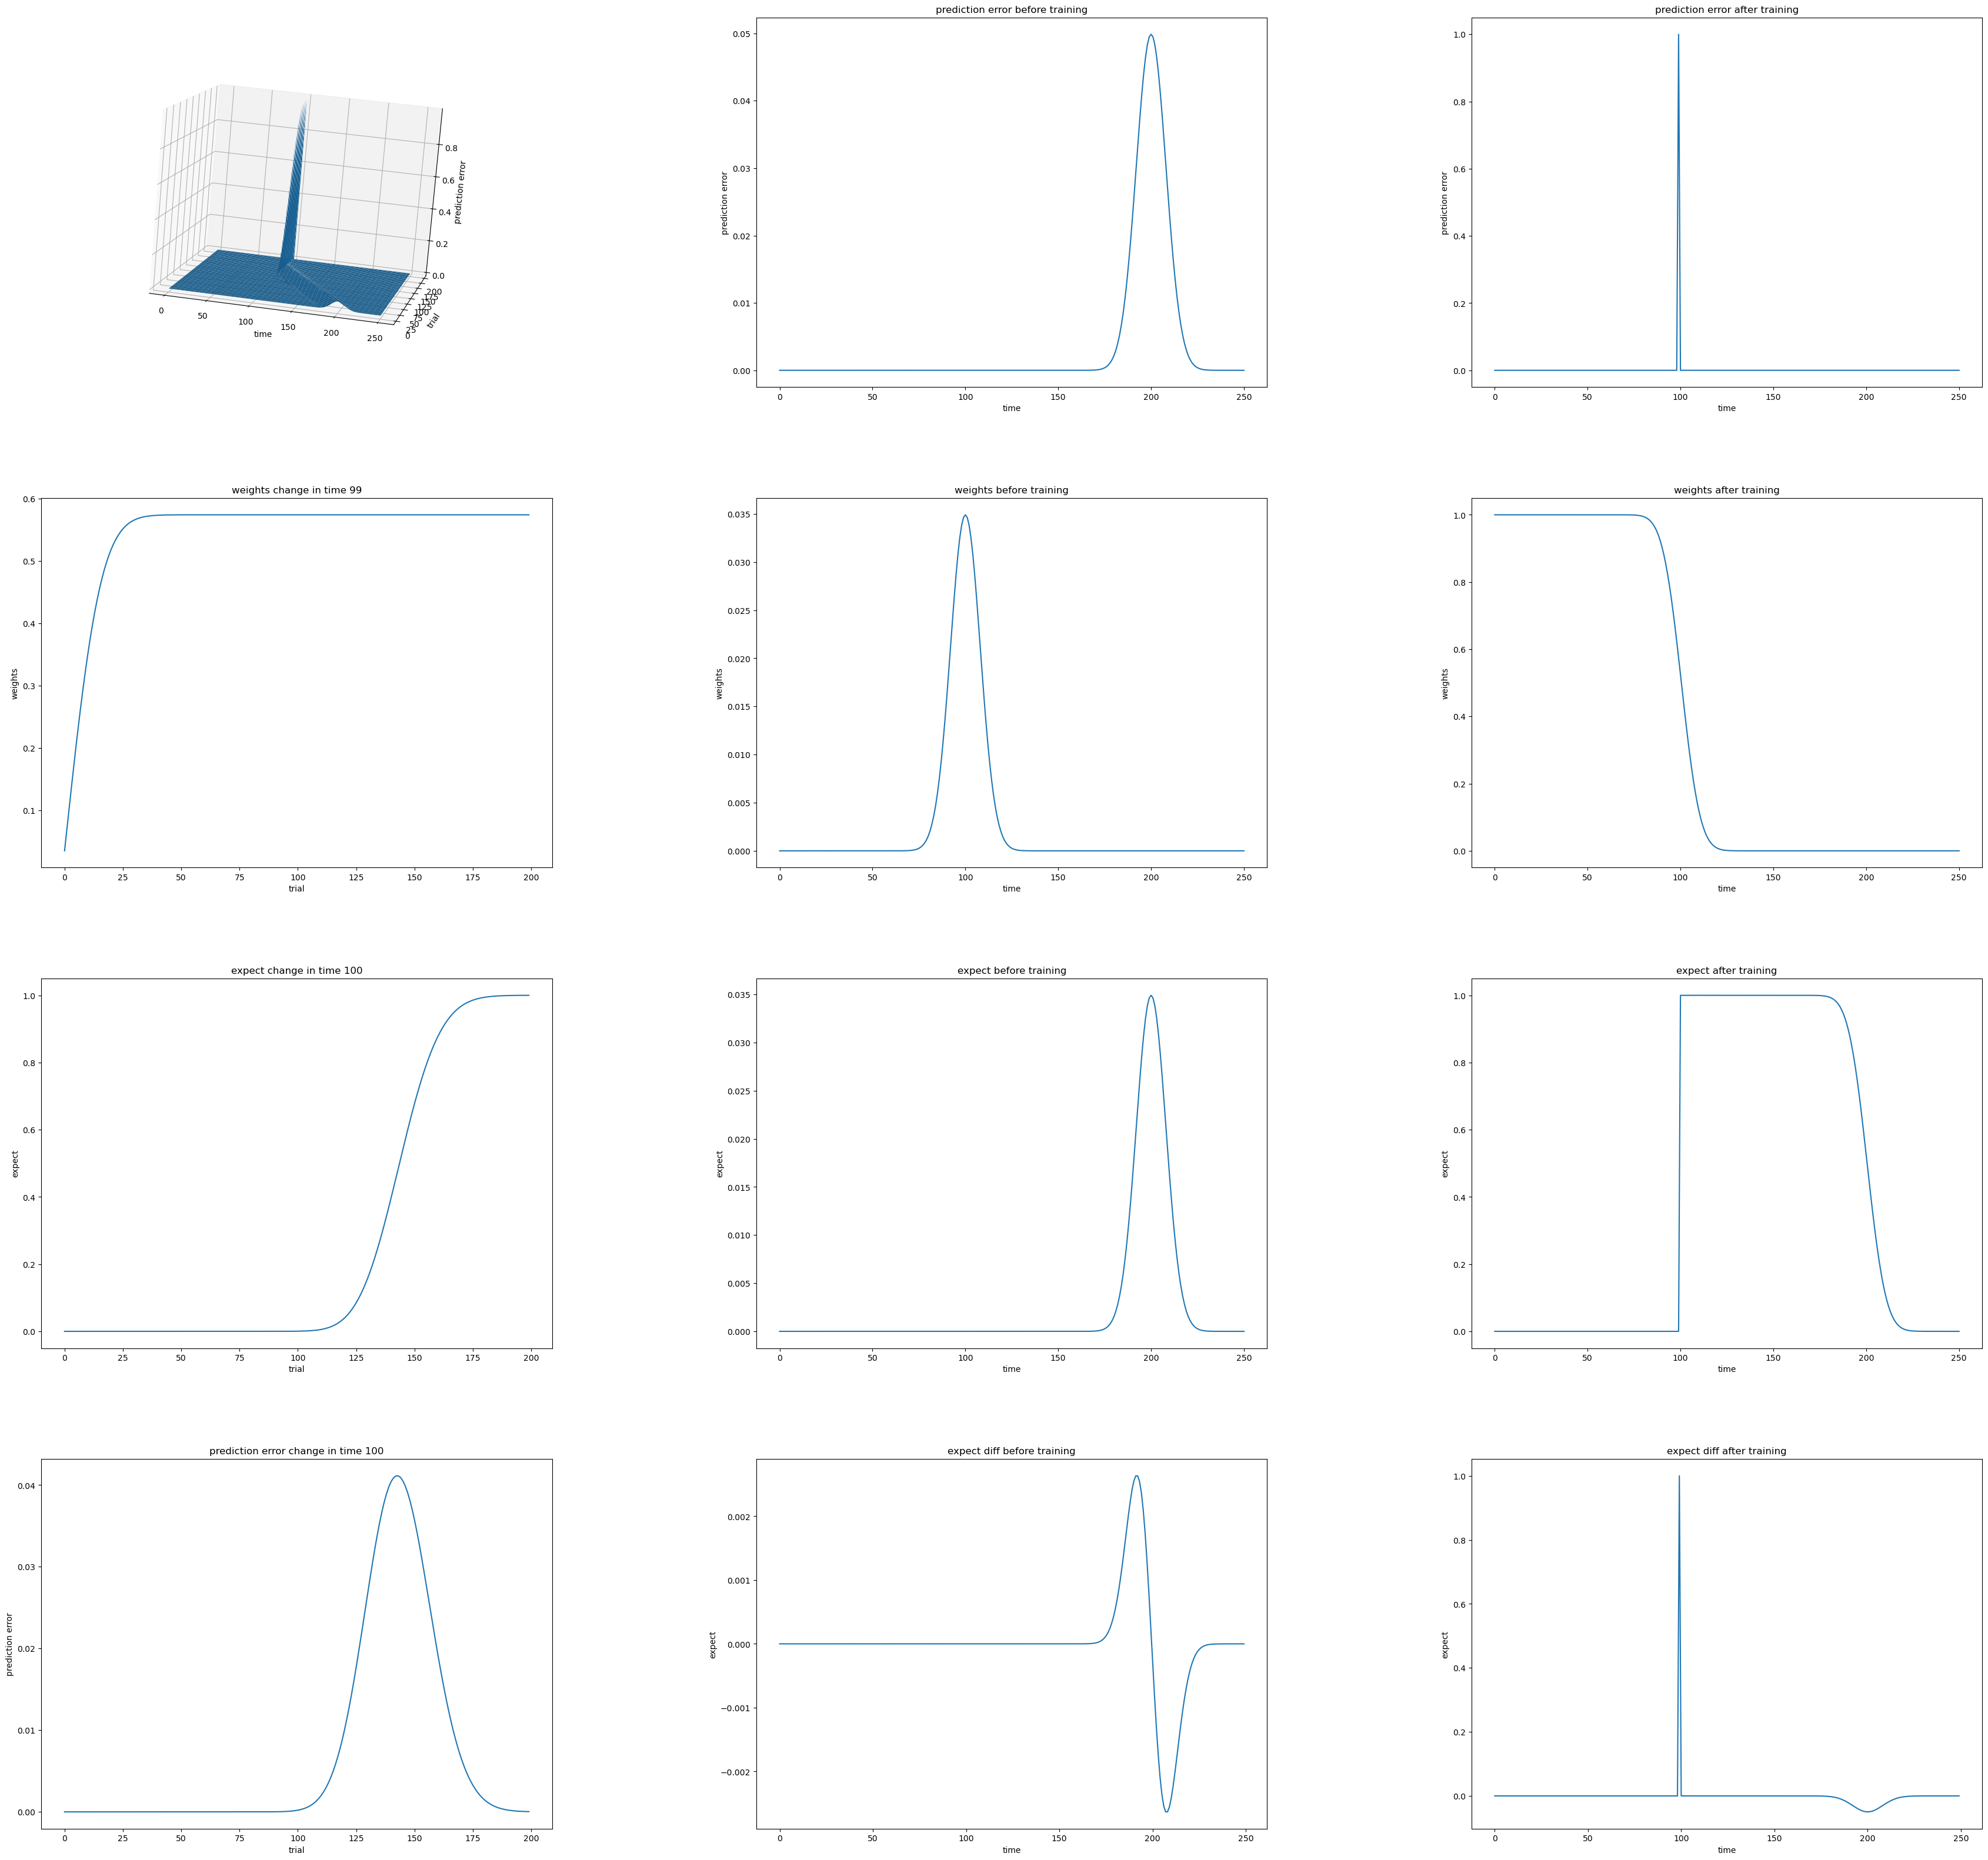

In [88]:
TDModel = main()

0


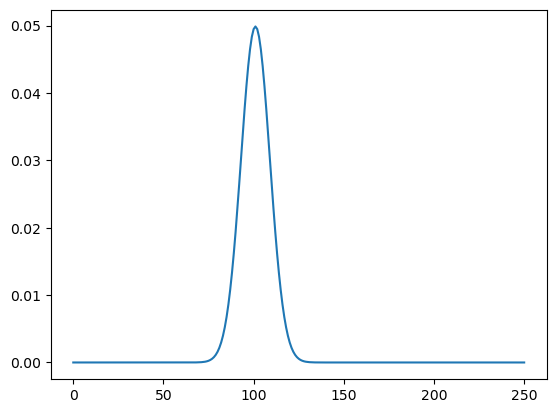

6


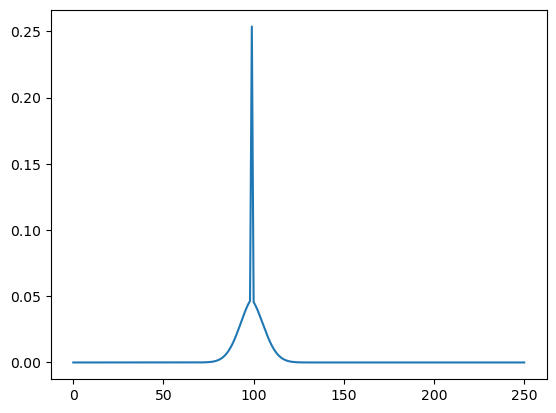

12


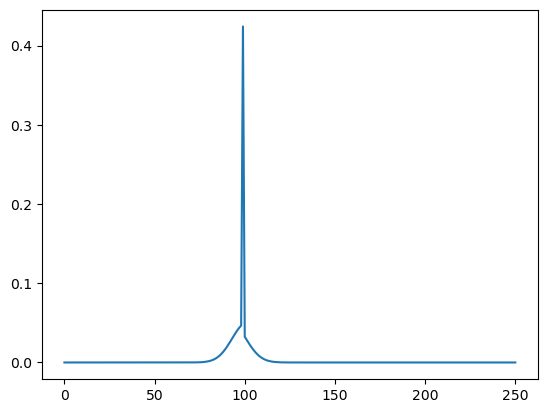

18


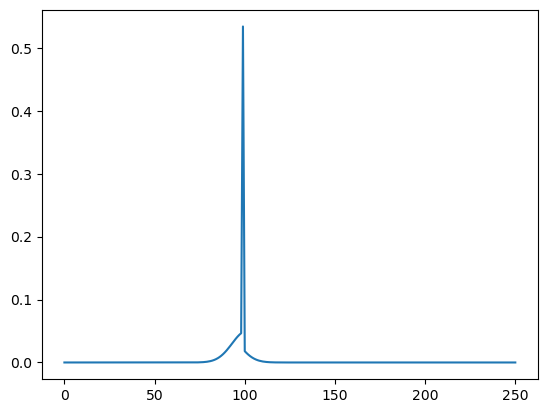

24


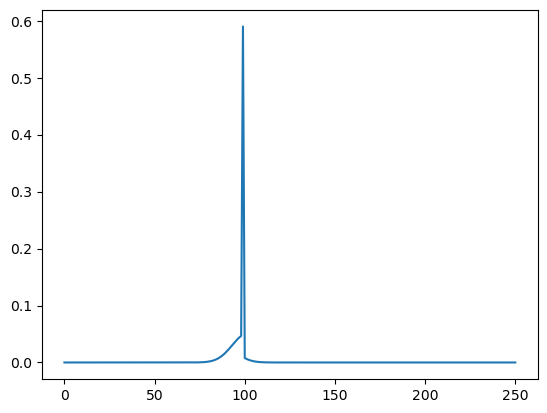

30


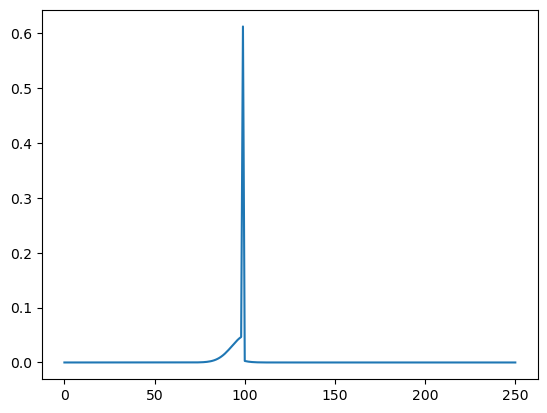

36


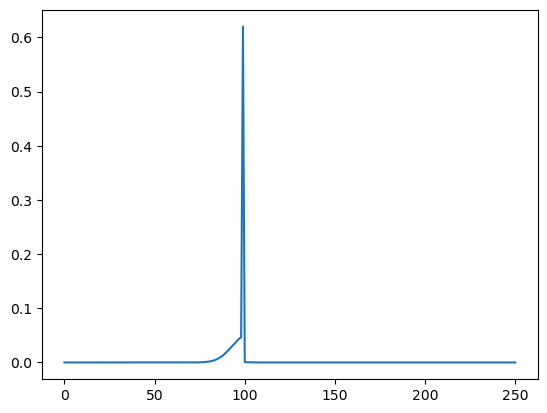

42


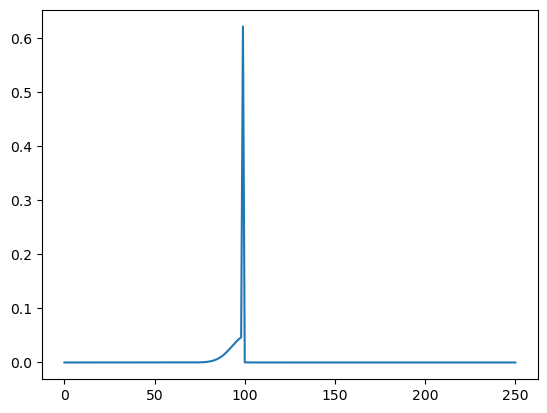

48


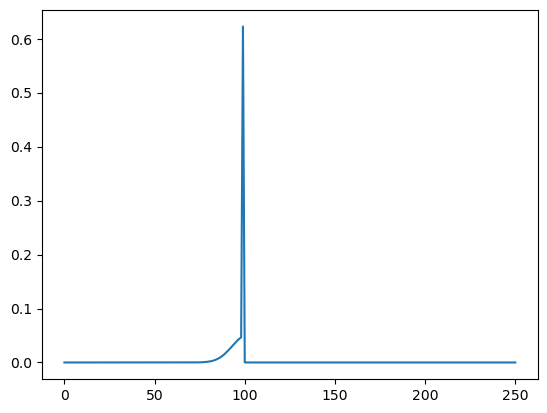

54


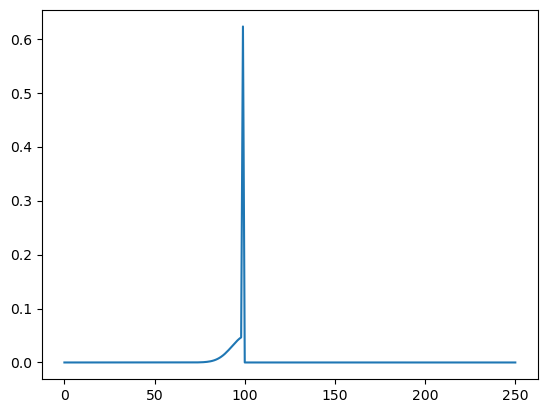

60


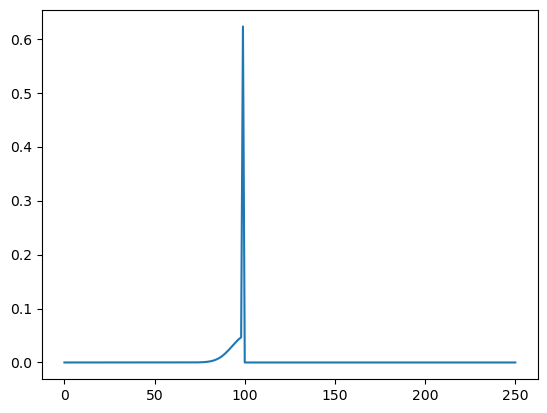

66


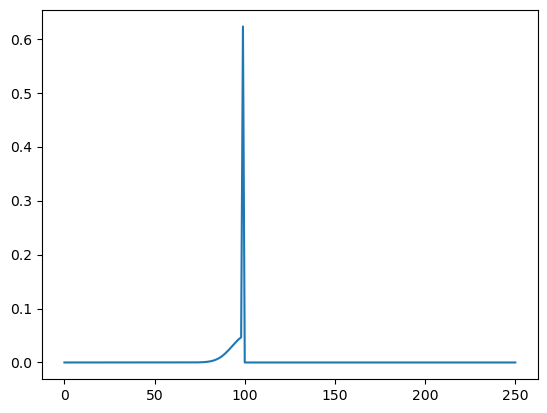

In [52]:
for i in range(0, TDModel.rangeTrials, 6):
    print(i)
    plt.plot(TDModel.predErr[:, i])
    # plt.yscale('log')
    plt.show()
    if i > 60:
        break